## Final Project Submission

Please fill out:
* Student name: Evans Karanja
* Student pace: part time
* Scheduled project review date/time: 13/04/2023
* Instructor name: Diana Mongina and Noah Kemboi
* Blog post URL:N/A

# Overview

The project analyzes what key factors one should consider during a movie production for it to be a success. The project will identify the reasonable profit margin that Microsoft should aim for and also identify the key competitors in film sector

# Business Problem
Microsoft wants to get into the film creation space, however they are not sure on which type of films to speciliaze on. By analyzing the BOM data we will see 

In [1]:
#Import  libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import data 
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')

In [3]:
#View the shape of the budget_df
movie_budgets_df.shape

(5782, 6)

In [4]:
#View the first five rows
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [5]:
#Preview the structure of budget_df
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [6]:
# Convert the production_budge,domestic_gross and worldwide_gross columns to numeric type
movie_budgets_df['production_budget'] = pd.to_numeric(movie_budgets_df['production_budget'].str.replace(',', '',regex=False).str.replace('$', '', regex=False))
movie_budgets_df['domestic_gross'] = pd.to_numeric(movie_budgets_df['domestic_gross'].str.replace(',', '', regex=False).str.replace('$', '', regex=False))
movie_budgets_df['worldwide_gross'] = pd.to_numeric(movie_budgets_df['worldwide_gross'].str.replace(',', '', regex=False).str.replace('$', '', regex=False))

#Print the results
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [7]:
# Calculate the net profit and profit margin for each movie
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']
movie_budgets_df['profit_margin'] = round(movie_budgets_df['net_profit'] / movie_budgets_df['worldwide_gross'], 4)

#Print the results
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.8469
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.6073
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.3370
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.7644
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.7593


In [8]:
#Remove movies with o gross revenue
movie_budgets_df.profit_margin.replace(-np.inf, np.nan, inplace=True)
movie_budgets_df.dropna(inplace=True)
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,profit_margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,0.8469
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.6073
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,-1.3370
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.7644
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,0.7593


In [9]:
#Create two new columns: gross_profit
movie_budgets_df['net_profit'] = movie_budgets_df['worldwide_gross'] - movie_budgets_df['production_budget']


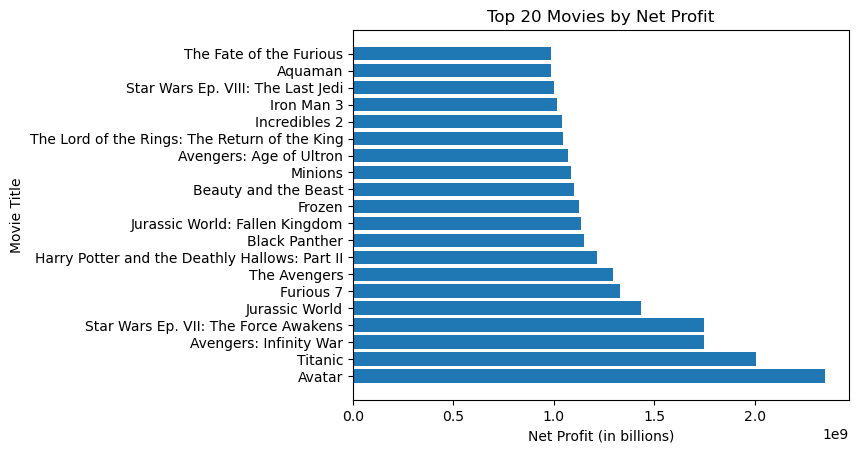

In [10]:
#Sort by highest to lowest
sorted_movies = movie_budgets_df.sort_values(by='net_profit', ascending=False)

# Get top 20 movies by net profit
top_20 = sorted_movies[:20]

# Create bar chart of top 20 movies by net profit
plt.barh(top_20['movie'], top_20['net_profit'])
plt.title('Top 20 Movies by Net Profit')
plt.xlabel('Net Profit (in billions)')
plt.ylabel('Movie Title')
plt.show()

Avatar,Titanit and Avengers were the top three movies that did well. Let's investigate why they did well? Is there are correlation of the investment to the profit?

The Pearson correlation coefficient between budget and net profit is: 0.6068652923681536


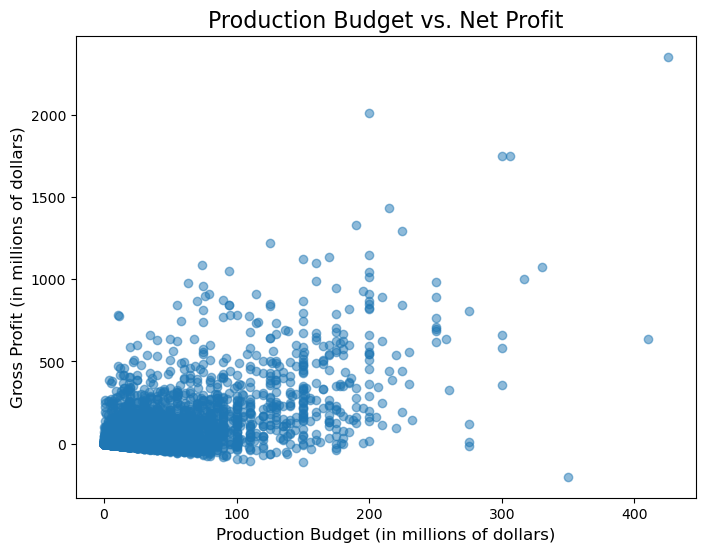

In [11]:
# calculate the Pearson correlation coefficient between budget and net profit
budget = movie_budgets_df['production_budget']
net_profit = movie_budgets_df['net_profit']
corr = np.corrcoef(budget, net_profit)[0, 1]

# print the correlation coefficient
print('The Pearson correlation coefficient between budget and net profit is:', corr)

# create a scatterplot of production budget and gross profit
plt.figure(figsize=(8,6))
plt.scatter(x=movie_budgets_df['production_budget']/1000000, y=movie_budgets_df['net_profit']/1000000, alpha=0.5)

# set the chart title and axes labels
plt.title('Production Budget vs. Net Profit', fontsize=16)
plt.xlabel('Production Budget (in millions of dollars)', fontsize=12)
plt.ylabel('Gross Profit (in millions of dollars)', fontsize=12)

# show the plot
plt.show()

A Pearson correlation coefficient of 0.61 indicates a moderate positive correlation between production budget and net profit. This means that as production budget increases, net profit tends to increase as well. However, it's important to note that correlation does not imply causation, so we cannot say for certain that increasing production budget will always lead to higher net profit.However, based on profit margins of successful movies, we can determine the profit margin to target for. This is through analyzing the profit margin for movies that have made a profit and compare that to the overall median profit margin to the median profit margin for the top 20 movies with the highest net profit:

In [12]:
# Compute the profit_margin 
movie_budgets_df['profit_margin'] = movie_budgets_df['net_profit'] / movie_budgets_df['worldwide_gross']

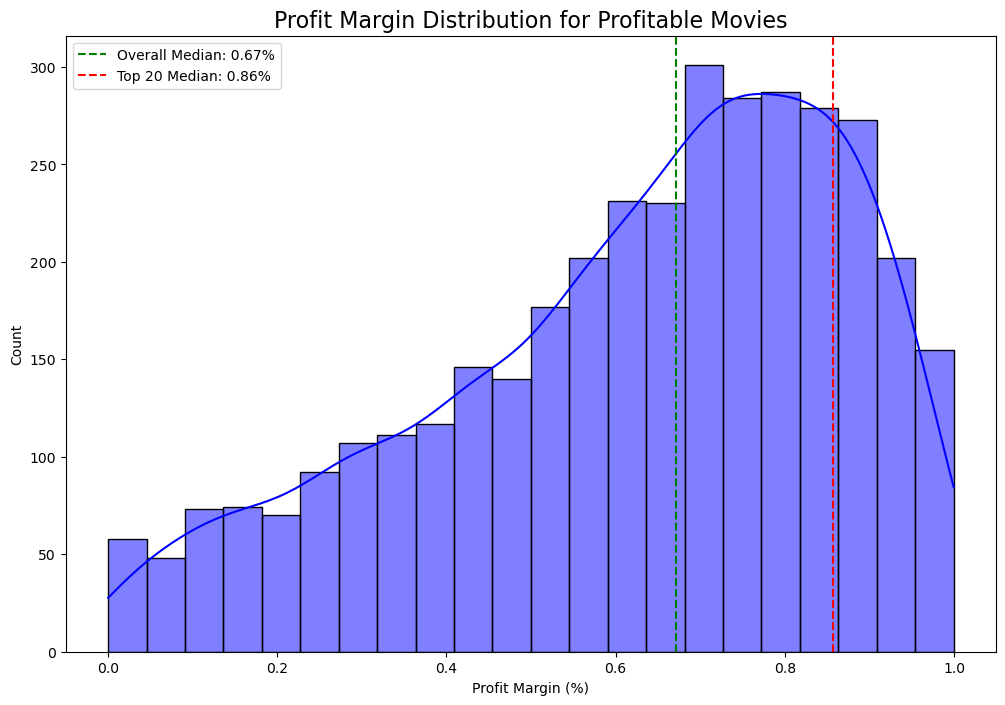

In [13]:
# Filter movies that have made a profit
profitable_movies = movie_budgets_df[movie_budgets_df['net_profit'] > 0]

# Calculate the overall median profit margin
overall_median = profitable_movies['profit_margin'].median()

# Calculate the median profit margin for the top 20 movies with highest net profit
top20_movies = profitable_movies.nlargest(20, 'net_profit')
top20_median = top20_movies['profit_margin'].median()

# Plot the profit margin distribution for profitable movies
plt.figure(figsize=(12, 8))
sns.histplot(profitable_movies['profit_margin'], kde=True, color='blue', alpha=0.5)
plt.axvline(x=overall_median, color='green', linestyle='--', label='Overall Median: {:.2f}%'.format(overall_median))
plt.axvline(x=top20_median, color='red', linestyle='--', label='Top 20 Median: {:.2f}%'.format(top20_median))
plt.xlabel('Profit Margin (%)')
plt.ylabel('Count')
plt.title('Profit Margin Distribution for Profitable Movies', fontsize=16)
plt.legend()
plt.show()

The median profit margin of all profitable movies stands at 67%, whereas for the top 20 movies with the highest net profit, it is 86%. By aiming for a profit margin of higher than 67% would guarantee the movie to a success.

Other factors

Who are the top studios we would potentially be competing against? To get this answer, we need to merge the movie_budgets dataframe with the movie dataframe.

In [14]:
#Import Movie_gross file
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')


In [15]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [16]:
# Create a merged df of both movie_budgets_df and movie_gross_df
merged_df = movie_budgets_df.merge(movie_gross_df, left_on='movie', right_on='title', how='inner')

In [17]:
merged_df.head()

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,net_profit,profit_margin,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,0.607331,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,0.764364,Avengers: Age of Ultron,BV,459000000.0,946400000,2015
2,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,0.853525,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
3,9,"Nov 17, 2017",Justice League,300000000,229024295,655945209,355945209,0.542645,Justice League,WB,229000000.0,428900000,2017
4,10,"Nov 6, 2015",Spectre,300000000,200074175,879620923,579620923,0.658944,Spectre,Sony,200100000.0,680600000,2015


In [18]:
# drop rows where the studio information is missing
merged_df = merged_df.dropna(subset=['studio'])

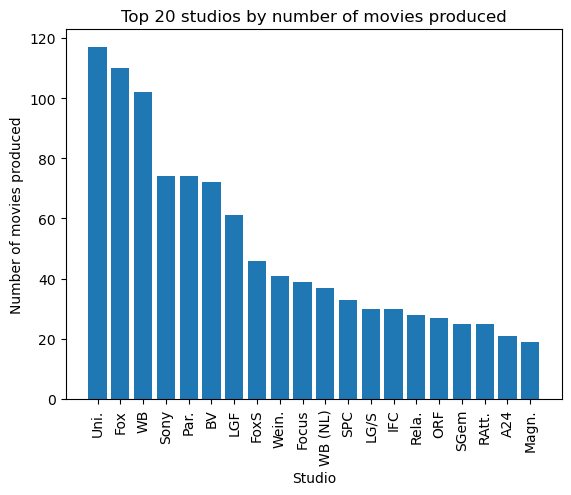

In [19]:
# group the merged dataframe by studio and count the number of movies produced
studio_counts = merged_df.groupby('studio')['title'].count()

# get the top 20 studios by number of movies produced
top_studios = studio_counts.sort_values(ascending=False)[:20]

# plot the top 20 studios by number of movies produced
plt.bar(top_studios.index, top_studios.values)
plt.xticks(rotation=90)
plt.xlabel('Studio')
plt.ylabel('Number of movies produced')
plt.title('Top 20 studios by number of movies produced')
plt.show()

Universal, Fox, and Warner Brothers are the top three studios and this would be the main competitors to compete with